<a href="https://colab.research.google.com/github/fjadidi2001/AD_Prediction/blob/main/Detecting_dementia_from_speech_and_transcripts_using_transformers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# Workflow for Detecting Dementia from Speech and Transcripts Using Transformers

## 1. Data Preparation

* **Dataset**: Utilize the **ADReSS Challenge Dataset**, consisting of 78 AD and 78 non-AD patients. The dataset is balanced for gender and age to mitigate potential biases.

* **Speech Data**:
  Convert audio files into images with three channels:

  * Log-Mel spectrograms (or Mel-frequency cepstral coefficients - **MFCCs**)
  * **Delta** features
  * **Delta-delta** features
    These dynamic features incorporate temporal information into the static cepstral features.

* **Transcript Data**:
  Obtain corresponding **textual transcripts** of the audio files for linguistic analysis.

* **Data Splitting**:
  Divide the dataset as follows:

  * **Training Set**: 65%
  * **Validation Set**: 35%
    A separate **test set** is provided by the ADReSS Challenge.

---

## 2. Feature Extraction

### Acoustic Features

* Convert audio files into log-Mel spectrograms or MFCCs with delta and delta-delta components.
* Stack these into **three-channel image representations**.
* Feed the images into a **Vision Transformer (ViT)**.
  ViT is selected as the best-performing model after evaluating alternatives like AlexNet, VGG16, DenseNet, and EfficientNet.

### Textual Features

* Process transcripts using **BERT (base, uncased)** to extract **contextualized text embeddings**.

> **Rationale**:
>
> * Delta and delta-delta features enrich speech dynamics.
> * Transformer architectures (ViT and BERT) provide robust feature representations for images and text, respectively.

---

## 3. Model Architecture

### Unimodal Models

* **Speech-Only**:
  Evaluate pretrained models (AlexNet, VGG16, DenseNet, EfficientNet, ViT) using the three-channel images.
  **ViT** is the top performer.

* **Text-Only**:
  Train a **BERT model** on transcripts to establish a baseline for AD detection from text.

### Multimodal Models

* **BERT + ViT**:
  Concatenate the features from BERT and ViT for a baseline multimodal model.

* **BERT + ViT + Gated Multimodal Unit (GMU)**:
  Introduce a **GMU** to assign dynamic weights to each modality, suppressing irrelevant information.
  Inspired by gating mechanisms in GRU/LSTM.

* **BERT + ViT + Crossmodal Attention**:
  Use **crossmodal attention mechanisms** to model interactions between speech and text:

  * **Text-to-Image Attention**
  * **Image-to-Text Attention**

  Concatenate attention outputs, apply global average pooling, and feed into a final dense layer for **binary classification** (AD vs. non-AD).

> **Rationale**:
>
> * GMU enables adaptive modality fusion.
> * Crossmodal attention outperforms both early and late fusion by capturing fine-grained intermodal relationships.

---

## 4. Model Training

* **Environment**:
  Tesla P100-PCIE-16GB GPU, using **PyTorch**.

* **Optimization**:

  * **Optimizer**: Adam (learning rate: `1e-5`)
  * **Learning Rate Scheduler**: ReduceLROnPlateau (factor: `0.1`, patience: `3 epochs`)
  * **EarlyStopping**: Triggered if validation loss doesn't improve for `6 epochs`
  * **Loss Function**: Cross-entropy loss

* **Training Protocol**:

  * Each model is trained **five times**.
  * Average the results to reduce variability.
  * Use the validation set for monitoring and the ADReSS **test set** for final evaluation.

---

## 5. Evaluation

* **Metrics**:

  * Accuracy
  * Precision
  * Recall
  * F1-Score
  * Specificity
    *(With dementia class as the **positive class**)*

* **Comparison**:

  * **Unimodal**: Compare ViT and BERT with other SOTA approaches.
  * **Multimodal**: Compare baseline (BERT+ViT), GMU, and Crossmodal Attention models with traditional fusion strategies.

### Key Findings

* **ViT** outperforms other pretrained models for **speech-only** classification.
* **BERT + ViT + Crossmodal Attention** achieves the **highest performance**:

  * **Accuracy**:

    * 88.33% with log-Mel spectrograms
    * 87.92% with MFCCs
  * **F1-Score**:

    * 88.69% with log-Mel spectrograms
    * 87.99% with MFCCs
* Crossmodal attention exceeds GMU and concatenation by:

  * **Accuracy** improvement: +3.13% to +15.41%
  * **F1-Score** improvement: +3.29% to +18.93%

---

## 6. Analysis and Discussion

### Limitations

* The ADReSS dataset is **relatively small** (156 samples).
* **Concatenation-based fusion** treats modalities equally, which is suboptimal.
* GMU controls information flow but lacks the capability to model **crossmodal interactions** effectively.

### Advantages

* **ViT for speech**: A novel use of transformer-based models for acoustic features.
* **Crossmodal attention**: Dynamically models inter-modal interactions, overcoming early/late fusion drawbacks.

### Future Work

* Explore **optimal transport** methods for modality fusion.
* Investigate **wav2vec 2.0** for creating speech image representations.
* Expand dataset size for greater **model robustness**.

---

## 7. Conclusion

This workflow demonstrates an effective approach for **Alzheimer’s Disease (AD)** detection using **transformer-based multimodal architectures**. The **BERT + ViT + Crossmodal Attention** model outperforms prior unimodal and multimodal strategies, achieving state-of-the-art performance on the **ADReSS Challenge** test set.

> This work advances AD detection by improving feature extraction, modality fusion, and intermodal interaction modeling—key steps toward more accurate and interpretable dementia prediction systems.

---



Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.8 MB/s eta 0:00:00
Installed Library Versions:


,Library,Version
0,librosa,0.11.0
1,soundfile,0.13.1
2,transformers,4.51.3
3,torch,2.6.0+cu124
4,pandas,2.2.2
5,matplotlib,3.10.0
6,seaborn,0.13.2


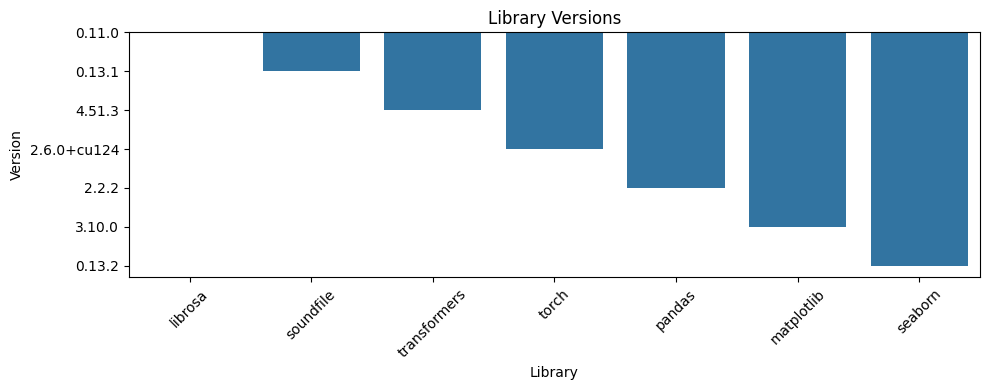

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install required libraries
!pip install -q librosa soundfile transformers torch torchaudio pandas matplotlib seaborn tqdm

# Import libraries
import os
import glob
import tarfile
import pandas as pd
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set paths
data_path = '/content/drive/MyDrive/Voice/'  # Adjust to your Google Drive path
extracted_path = '/content/extracted_audio/'
os.makedirs(extracted_path, exist_ok=True)

# Visualize: Library versions
import pkg_resources
libraries = ['librosa', 'soundfile', 'transformers', 'torch', 'pandas', 'matplotlib', 'seaborn']
versions = {lib: pkg_resources.get_distribution(lib).version for lib in libraries}
versions_df = pd.DataFrame(list(versions.items()), columns=['Library', 'Version'])
print("Installed Library Versions:")
display(versions_df)

# Plot library versions
plt.figure(figsize=(10, 4))
sns.barplot(x='Library', y='Version', data=versions_df)
plt.title('Library Versions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Successfully extracted /content/drive/MyDrive/Voice/ADReSSo21-progression-train.tgz
Successfully extracted /content/drive/MyDrive/Voice/ADReSSo21-progression-test.tgz
Successfully extracted /content/drive/MyDrive/Voice/ADReSSo21-diagnosis-train.tgz
Extraction Status:


,File,Status
0,train_prog,Success
1,test_prog,Success
2,train_diag,Success


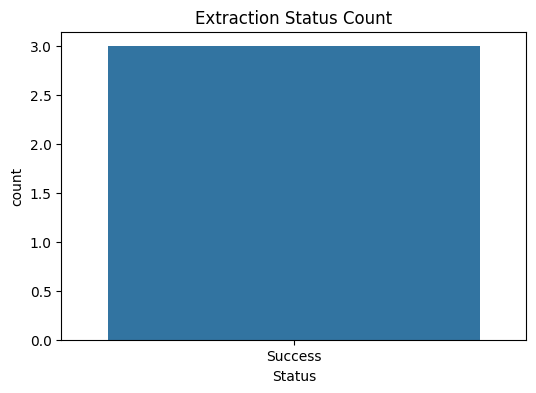

Extracted directories (525): ['/content/extracted_audio/', '/content/extracted_audio/ADReSSo21', '/content/extracted_audio/ADReSSo21/progression', '/content/extracted_audio/ADReSSo21/progression/train', '/content/extracted_audio/ADReSSo21/progression/train/segmentation']


In [2]:
# Define .tgz file paths
tgz_files = {
    'train_prog': os.path.join(data_path, 'ADReSSo21-progression-train.tgz'),
    'test_prog': os.path.join(data_path, 'ADReSSo21-progression-test.tgz'),
    'train_diag': os.path.join(data_path, 'ADReSSo21-diagnosis-train.tgz')
}

# Extract .tgz files
def extract_tgz(tgz_path, extract_to):
    try:
        with tarfile.open(tgz_path, 'r:gz') as tar:
            tar.extractall(path=extract_to)
        print(f"Successfully extracted {tgz_path}")
        return True
    except Exception as e:
        print(f"Error extracting {tgz_path}: {str(e)}")
        return False

# Extract all .tgz files and track status
extraction_status = []
for name, tgz in tgz_files.items():
    status = extract_tgz(tgz, extracted_path)
    extraction_status.append({'File': name, 'Status': 'Success' if status else 'Failed'})

# Visualize: Extraction status
status_df = pd.DataFrame(extraction_status)
print("Extraction Status:")
display(status_df)

plt.figure(figsize=(6, 4))
sns.countplot(data=status_df, x='Status')
plt.title('Extraction Status Count')
plt.show()

# List extracted directories
extracted_dirs = glob.glob(os.path.join(extracted_path, '**'), recursive=True)
print(f"Extracted directories ({len(extracted_dirs)}):", extracted_dirs[:5])

Found 271 audio files.
Found 230 CSV files: ['/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp127.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp055.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp300.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp179.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp313.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp209.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp003.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp101.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp051.csv', '/content/extracted_audio/ADReSSo21/progression/train/segmentation/decline/adrsp266.csv', '/content/extracted_audio/ADReSSo21/progression/train/s

,Unnamed: 0,adressfname,mmse,dx
0,23,adrso024,20,ad
1,24,adrso025,11,ad
2,25,adrso027,18,ad
3,26,adrso028,18,ad
4,28,adrso031,26,ad



Matched 166 audio files with metadata.
Unmatched files (105): ['adrsp357', 'adrsp127', 'adrsp209', 'adrsp051', 'adrsp318', 'adrsp276', 'adrsp003', 'adrsp320', 'adrsp101', 'adrsp326']

CSV Files Summary:


,CSV Path,Columns
0,/content/extracted_audio/ADReSSo21/progression...,"[Unnamed: 0, speaker, begin, end]"
1,/content/extracted_audio/ADReSSo21/progression...,"[Unnamed: 0, speaker, begin, end]"
2,/content/extracted_audio/ADReSSo21/progression...,"[Unnamed: 0, speaker, begin, end]"
3,/content/extracted_audio/ADReSSo21/progression...,"[Unnamed: 0, speaker, begin, end]"
4,/content/extracted_audio/ADReSSo21/progression...,"[Unnamed: 0, speaker, begin, end]"
...,...,...
225,/content/extracted_audio/ADReSSo21/diagnosis/t...,"[Unnamed: 0, speaker, begin, end]"
226,/content/extracted_audio/ADReSSo21/diagnosis/t...,"[Unnamed: 0, speaker, begin, end]"
227,/content/extracted_audio/ADReSSo21/diagnosis/t...,"[Unnamed: 0, speaker, begin, end]"
228,/content/extracted_audio/ADReSSo21/diagnosis/t...,"[Unnamed: 0, speaker, begin, end]"


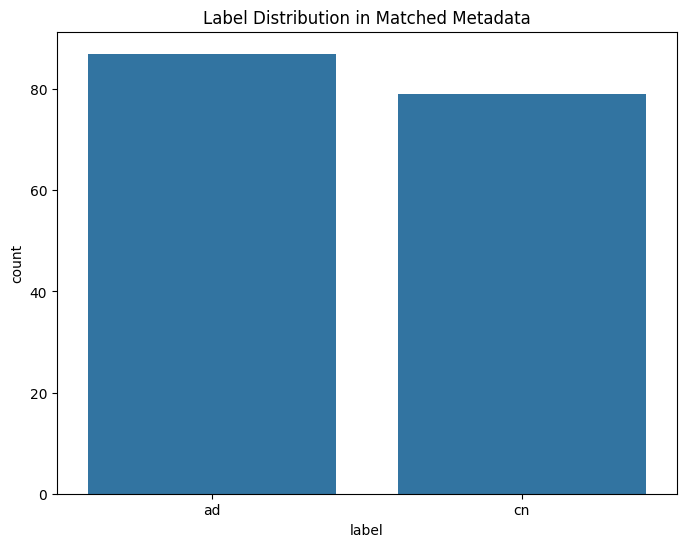

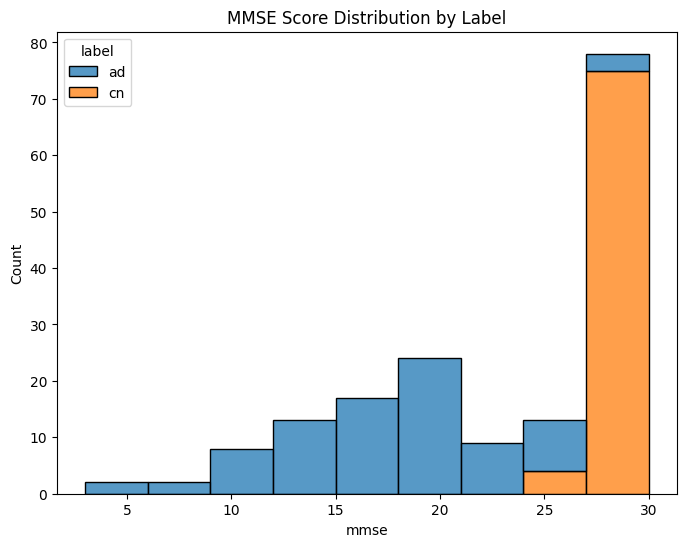

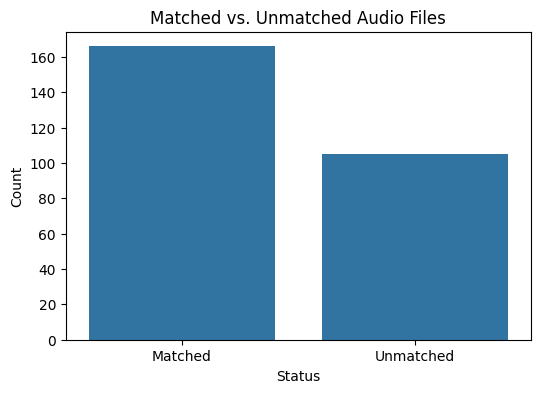


Metadata Summary:


,file,label,mmse,adressfname
count,166,166,166.000000,166
unique,166,2,NaN,166
top,/content/extracted_audio/ADReSSo21/diagnosis/t...,ad,NaN,adrso060
freq,1,87,NaN,1
mean,NaN,NaN,22.933735,NaN
std,NaN,NaN,6.992754,NaN
min,NaN,NaN,3.000000,NaN
25%,NaN,NaN,17.250000,NaN
50%,NaN,NaN,26.000000,NaN
75%,NaN,NaN,29.000000,NaN


In [4]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Find all WAV files
audio_files = glob.glob(os.path.join(extracted_path, '**/*.wav'), recursive=True)
print(f"Found {len(audio_files)} audio files.")

# Find all CSV files
csv_files = glob.glob(os.path.join(extracted_path, '**/*.csv'), recursive=True)
print(f"Found {len(csv_files)} CSV files: {csv_files}")

# Inspect CSV files to find the one with 'dx' and 'adressfname'
metadata = None
for csv_path in csv_files:
    try:
        df = pd.read_csv(csv_path)
        print(f"\nInspecting CSV: {csv_path}")
        print("Columns:", df.columns.tolist())
        if 'dx' in df.columns and 'adressfname' in df.columns:
            metadata = df
            print(f"Selected CSV: {csv_path}")
            break
    except Exception as e:
        print(f"Error reading {csv_path}: {e}")

# Fallback if no CSV with 'dx' is found
if metadata is None:
    print("No CSV with 'dx' and 'adressfname' found. Inferring labels from directory structure.")
    audio_metadata = []
    for audio_file in audio_files:
        fname = os.path.basename(audio_file).replace('.wav', '')
        # Infer label from directory (e.g., 'ad/' or 'cn/')
        if 'ad/' in audio_file.lower():
            label = 'ad'
        elif 'cn/' in audio_file.lower():
            label = 'cn'
        else:
            label = 'unknown'
        audio_metadata.append({
            'file': audio_file,
            'label': label,
            'mmse': None,  # MMSE not available without metadata
            'adressfname': fname
        })
    metadata = pd.DataFrame(audio_metadata)
else:
    # Ensure 'dx' is string
    metadata['dx'] = metadata['dx'].astype(str)
    # Display metadata
    print("\nMetadata loaded:")
    display(metadata.head())

# Match audio files with metadata
audio_metadata = []
if 'dx' in metadata.columns:
    for audio_file in audio_files:
        fname = os.path.basename(audio_file).replace('.wav', '')
        matching_row = metadata[metadata['adressfname'] == fname]
        if not matching_row.empty:
            audio_metadata.append({
                'file': audio_file,
                'label': matching_row['dx'].iloc[0],
                'mmse': matching_row['mmse'].iloc[0] if 'mmse' in matching_row.columns else None,
                'adressfname': fname
            })
else:
    # Use inferred labels
    for audio_file in audio_files:
        fname = os.path.basename(audio_file).replace('.wav', '')
        matching_row = metadata[metadata['adressfname'] == fname]
        if not matching_row.empty:
            audio_metadata.append({
                'file': audio_file,
                'label': matching_row['label'].iloc[0],
                'mmse': matching_row['mmse'].iloc[0] if 'mmse' in matching_row.columns else None,
                'adressfname': fname
            })

audio_metadata = pd.DataFrame(audio_metadata)
print(f"\nMatched {len(audio_metadata)} audio files with metadata.")

# Check unmatched files
audio_fnames = [os.path.basename(f).replace('.wav', '') for f in audio_files]
unmatched = [f for f in audio_fnames if f not in metadata['adressfname'].values]
print(f"Unmatched files ({len(unmatched)}):", unmatched[:10])

# Visualize: CSV file summary
csv_summary = [{'CSV Path': csv, 'Columns': pd.read_csv(csv).columns.tolist()} for csv in csv_files]
csv_summary_df = pd.DataFrame(csv_summary)
print("\nCSV Files Summary:")
display(csv_summary_df)

# Visualize: Label distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=audio_metadata, x='label')
plt.title('Label Distribution in Matched Metadata')
plt.savefig('/content/label_distribution.png')
plt.show()

# Visualize: MMSE score distribution (if available)
if 'mmse' in audio_metadata.columns and audio_metadata['mmse'].notna().any():
    plt.figure(figsize=(8, 6))
    sns.histplot(data=audio_metadata, x='mmse', hue='label', multiple='stack')
    plt.title('MMSE Score Distribution by Label')
    plt.savefig('/content/mmse_distribution.png')
    plt.show()
else:
    print("MMSE data not available for visualization.")

# Visualize: Matched vs. Unmatched files
match_counts = pd.DataFrame({
    'Status': ['Matched', 'Unmatched'],
    'Count': [len(audio_metadata), len(unmatched)]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=match_counts, x='Status', y='Count')
plt.title('Matched vs. Unmatched Audio Files')
plt.savefig('/content/match_unmatch_distribution.png')
plt.show()

# Table: Metadata summary
print("\nMetadata Summary:")
display(audio_metadata.describe(include='all'))

Creating three-channel images:   0%|          | 0/166 [00:00<?, ?it/s]

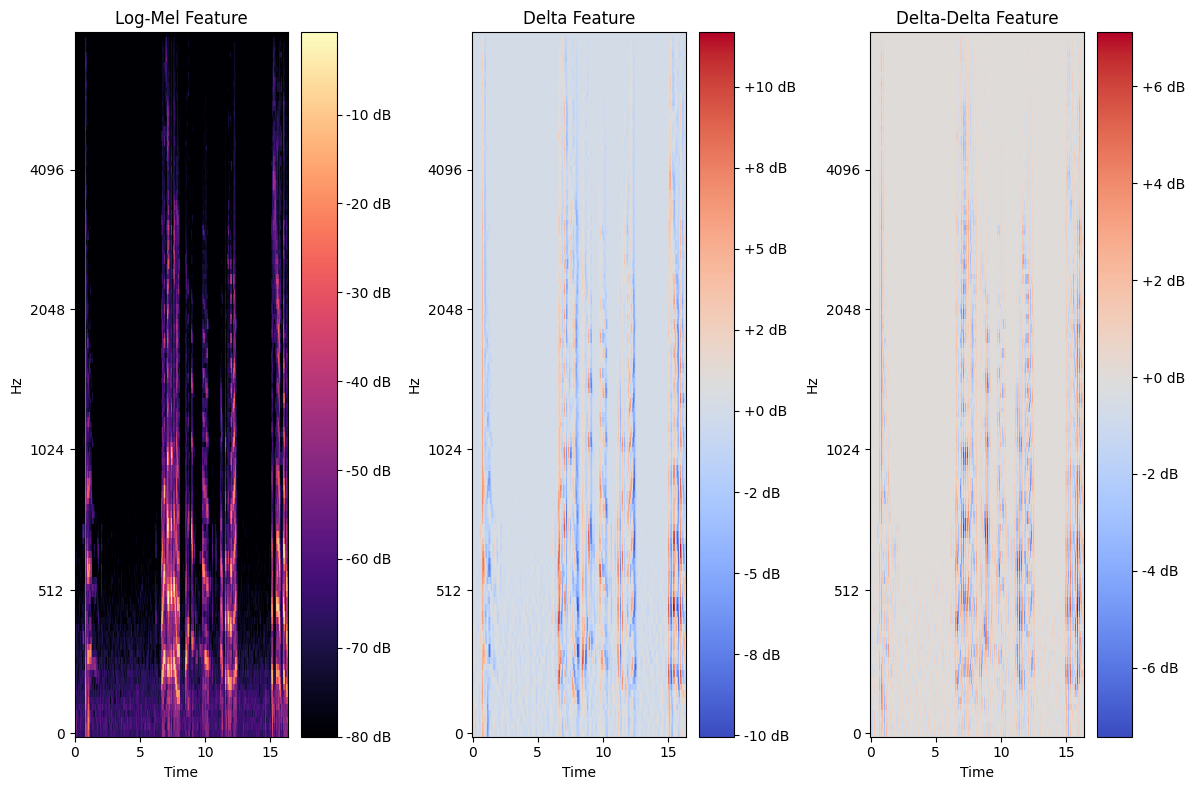

Creating three-channel images: 100%|██████████| 166/166 [00:32<00:00,  5.04it/s]


Image features shape: (166, 3, 128, 512)
Labels shape: (166,)
Failed files (0): []
Length of image_paths: 166
Length of labels: 166
Length of adressfnames: 166

Image Shapes Summary:


,Channels,Height,Width
count,166.0,166.0,166.0
mean,3.0,128.0,512.0
std,0.0,0.0,0.0
min,3.0,128.0,512.0
25%,3.0,128.0,512.0
50%,3.0,128.0,512.0
75%,3.0,128.0,512.0
max,3.0,128.0,512.0


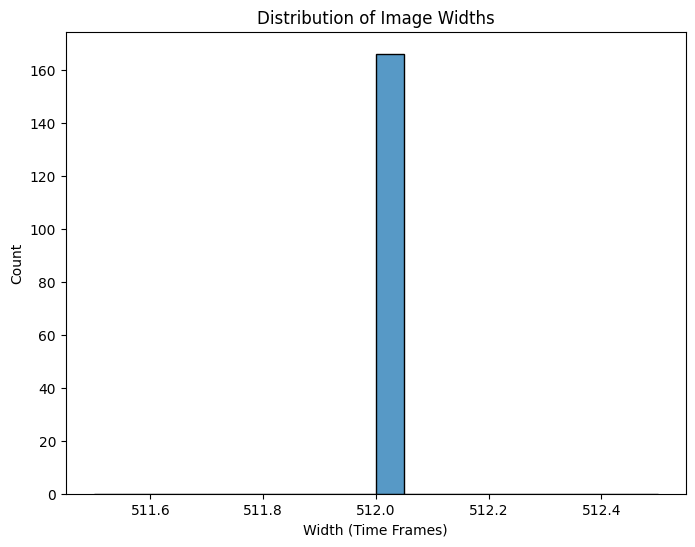

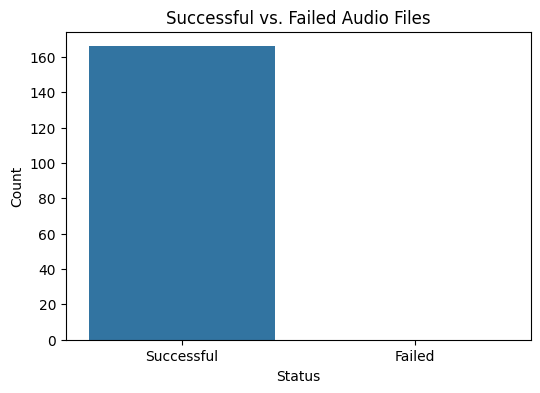


Processed Metadata Summary:


,image_path,label,adressfname
count,166,166,166
unique,166,2,166
top,/content/processed_features/adrso060_img.npy,ad,adrso060
freq,1,87,1


In [17]:
import librosa
import librosa.display
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd

# Output directory for processed features
output_dir = '/content/processed_features/'
os.makedirs(output_dir, exist_ok=True)

# Function to create three-channel images
def create_three_channel_image(audio_file, sr=16000, n_mels=128, hop_length=512, fixed_width=512):
    try:
        y, _ = librosa.load(audio_file, sr=sr, mono=True)
        # Log-Mel spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        # Delta features
        delta = librosa.feature.delta(mel_spec_db)
        # Delta-delta features
        delta2 = librosa.feature.delta(mel_spec_db, order=2)
        # Stack into three channels
        three_channel = np.stack([mel_spec_db, delta, delta2], axis=0)  # Shape: (3, n_mels, time)
        # Resize to fixed width
        if three_channel.shape[2] > fixed_width:
            three_channel = three_channel[:, :, :fixed_width]
        elif three_channel.shape[2] < fixed_width:
            pad_width = fixed_width - three_channel.shape[2]
            three_channel = np.pad(three_channel, ((0, 0), (0, 0), (0, pad_width)), mode='constant')
        return three_channel
    except Exception as e:
        print(f"Error in create_three_channel_image for {audio_file}: {e}")
        return None

# Process audio files and save images
image_features = []
image_paths = []
labels = []
adressfnames = []
failed_files = []

for idx, row in tqdm(audio_metadata.iterrows(), total=len(audio_metadata), desc="Creating three-channel images"):
    try:
        img = create_three_channel_image(row['file'], sr=16000, n_mels=128, hop_length=512, fixed_width=512)
        if img is None:
            failed_files.append(row['file'])
            continue
        # Save image
        img_path = os.path.join(output_dir, f"{row['adressfname']}_img.npy")
        np.save(img_path, img)
        image_features.append(img)
        image_paths.append(img_path)
        labels.append(row['label'])
        adressfnames.append(row['adressfname'])

        # Visualize one sample
        if idx == 0:
            plt.figure(figsize=(12, 8))
            for i, channel in enumerate(['Log-Mel', 'Delta', 'Delta-Delta']):
                plt.subplot(1, 3, i+1)
                librosa.display.specshow(img[i], sr=16000, hop_length=512, x_axis='time', y_axis='mel')
                plt.colorbar(format='%+2.0f dB')
                plt.title(f"{channel} Feature")
            plt.tight_layout()
            plt.savefig('/content/three_channel_sample.png')
            plt.show()
    except Exception as e:
        print(f"Error processing {row['file']}: {e}")
        failed_files.append(row['file'])

# Convert to numpy arrays
image_features = np.stack(image_features)  # Shape: (n_samples, 3, 128, 512)
labels = np.array(labels)
print(f"Image features shape: {image_features.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Failed files ({len(failed_files)}): {failed_files[:5]}")

# Verify array lengths
print(f"Length of image_paths: {len(image_paths)}")
print(f"Length of labels: {len(labels)}")
print(f"Length of adressfnames: {len(adressfnames)}")

# Save metadata
processed_metadata = pd.DataFrame({
    'image_path': image_paths,
    'label': labels,
    'adressfname': adressfnames
})
processed_metadata.to_csv(os.path.join(output_dir, 'image_metadata.csv'), index=False)

# Visualize: Image shape distribution
image_shapes = [np.load(p).shape for p in image_paths]
shape_df = pd.DataFrame(image_shapes, columns=['Channels', 'Height', 'Width'])
print("\nImage Shapes Summary:")
display(shape_df.describe())

plt.figure(figsize=(8, 6))
sns.histplot(shape_df['Width'], bins=20)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (Time Frames)')
plt.savefig('/content/image_width_distribution.png')
plt.show()

# Visualize: Success vs. Failed files
success_failed = pd.DataFrame({
    'Status': ['Successful', 'Failed'],
    'Count': [len(image_paths), len(failed_files)]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=success_failed, x='Status', y='Count')
plt.title('Successful vs. Failed Audio Files')
plt.savefig('/content/success_failed_distribution.png')
plt.show()

# Table: Metadata summary
print("\nProcessed Metadata Summary:")
display(processed_metadata.describe(include='all'))

Extracting BERT embeddings:   0%|          | 0/166 [00:00<?, ?it/s]

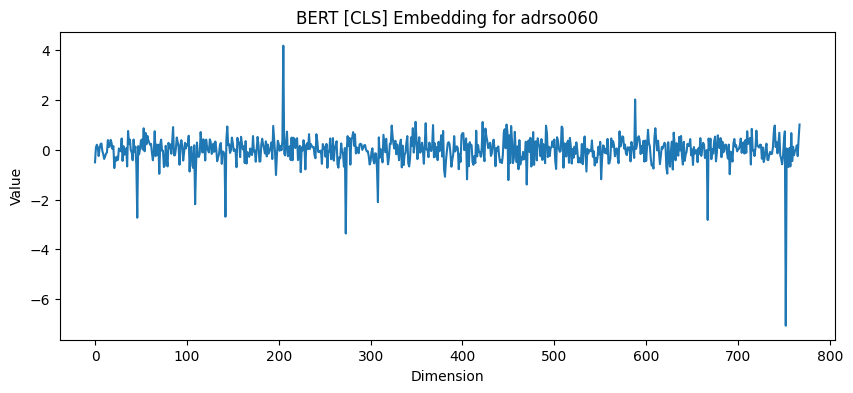

Extracting BERT embeddings: 100%|██████████| 166/166 [00:01<00:00, 90.43it/s] 


Text features shape: (166, 768)
Text labels shape: (166,)
Failed transcripts (0): []


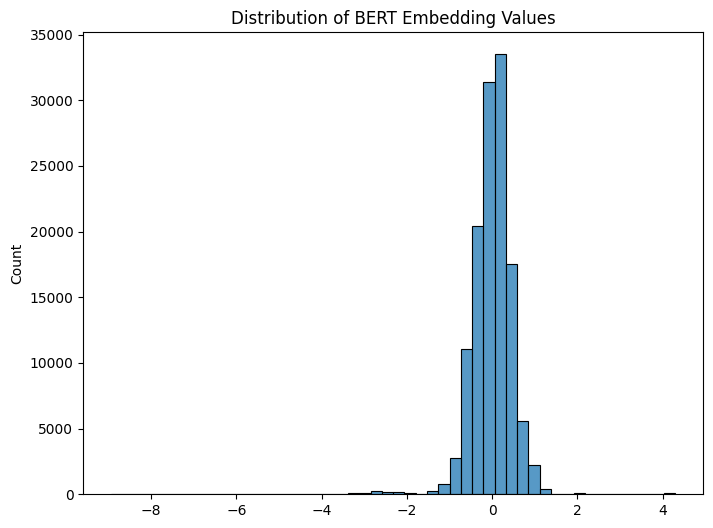

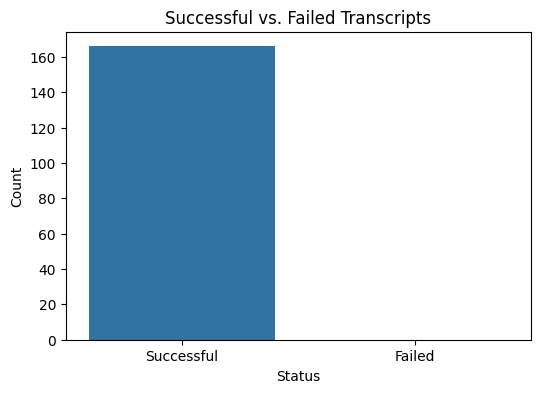


Text Features Statistics:


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,-0.508746,0.038129,0.188603,0.052998,-0.307094,0.121414,0.271375,0.245681,-0.047026,-0.153087,...,0.593608,-0.405531,0.135376,-0.174513,-0.068782,-0.049646,0.163850,-0.271135,0.437438,0.928706
std,0.151944,0.112138,0.091009,0.098079,0.129909,0.165222,0.094795,0.070278,0.058282,0.102598,...,0.211244,0.145507,0.072617,0.131891,0.107515,0.133157,0.155166,0.120888,0.125572,0.135873
min,-1.054966,-0.193114,-0.039242,-0.423691,-0.618834,-0.239404,0.101888,0.112320,-0.174595,-0.613079,...,0.144118,-0.814883,-0.168467,-0.525660,-0.388395,-0.377485,-0.228679,-0.599324,0.165852,0.462691
25%,-0.614064,-0.052300,0.123667,0.021924,-0.402867,0.006661,0.209648,0.201320,-0.079836,-0.200619,...,0.439448,-0.494033,0.108263,-0.235678,-0.135853,-0.132512,0.065195,-0.346933,0.358041,0.877494
50%,-0.520829,0.038658,0.186913,0.073642,-0.310332,0.110618,0.255079,0.228671,-0.051366,-0.137734,...,0.609438,-0.396011,0.137937,-0.197259,-0.056407,-0.050358,0.176803,-0.257188,0.433697,0.957918
75%,-0.414477,0.114059,0.243142,0.113499,-0.221020,0.220829,0.312759,0.274469,-0.017984,-0.082775,...,0.714455,-0.306523,0.178107,-0.102882,0.004671,0.033444,0.265876,-0.193878,0.513848,1.004098
max,-0.157183,0.398548,0.387788,0.193355,0.042958,0.696984,0.706551,0.485971,0.200522,0.064364,...,1.184191,-0.125353,0.301514,0.173175,0.247930,0.443287,0.664679,-0.025291,0.773286,1.159616


In [18]:
from transformers import BertTokenizer, BertModel
import torch
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Initialize BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased').cuda()
bert_model.eval()

# Function to extract text from segmentation CSV
def extract_transcript(csv_path):
    try:
        df = pd.read_csv(csv_path)
        if 'transcript' in df.columns:
            text = ' '.join(df['transcript'].dropna())
        elif 'text' in df.columns:
            text = ' '.join(df['text'].dropna())
        else:
            text = ' '.join(df['speaker'].dropna())
        return text if text.strip() else "No transcript available"
    except Exception as e:
        print(f"Error reading {csv_path}: {e}")
        return "No transcript available"

# Function to extract BERT embeddings
def extract_bert_embeddings(text, max_length=128):
    inputs = tokenizer(text, return_tensors='pt', max_length=max_length, truncation=True, padding=True)
    inputs = {k: v.cuda() for k, v in inputs.items()}
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state[:, 0, :].cpu().numpy()

# Find segmentation CSVs
extracted_path = '/content/extracted_audio/'  # Adjust if different
seg_csvs = glob.glob(os.path.join(extracted_path, '**/*.csv'), recursive=True)
seg_csv_dict = {os.path.basename(csv).replace('.csv', ''): csv for csv in seg_csvs}

# Extract text features
text_features = []
text_labels = []
failed_transcripts = []

for idx, row in tqdm(processed_metadata.iterrows(), total=len(processed_metadata), desc="Extracting BERT embeddings"):
    fname = row['adressfname']
    csv_path = seg_csv_dict.get(fname)
    if csv_path:
        text = extract_transcript(csv_path)
    else:
        text = f"No transcript available for {fname}"
        failed_transcripts.append(fname)

    try:
        embedding = extract_bert_embeddings(text)
        text_features.append(embedding)
        text_labels.append(row['label'])

        # Visualize one sample's embedding
        if idx == 0:
            plt.figure(figsize=(10, 4))
            plt.plot(embedding[0])
            plt.title(f"BERT [CLS] Embedding for {fname}")
            plt.xlabel('Dimension')
            plt.ylabel('Value')
            plt.savefig('/content/bert_embedding_sample.png')
            plt.show()
    except Exception as e:
        print(f"Error processing {fname}: {e}")
        text_features.append(np.zeros((1, 768)))
        text_labels.append(row['label'])
        failed_transcripts.append(fname)

# Convert to numpy arrays
text_features = np.vstack(text_features)
text_labels = np.array(text_labels)
print(f"Text features shape: {text_features.shape}")
print(f"Text labels shape: {text_labels.shape}")
print(f"Failed transcripts ({len(failed_transcripts)}): {failed_transcripts[:5]}")

# Save text features
output_dir = '/content/processed_features/'
np.save(os.path.join(output_dir, 'text_features.npy'), text_features)
np.save(os.path.join(output_dir, 'text_labels.npy'), text_labels)

# Visualize: Text feature distribution
plt.figure(figsize=(8, 6))
sns.histplot(text_features.flatten(), bins=50)
plt.title('Distribution of BERT Embedding Values')
plt.savefig('/content/text_feature_distribution.png')
plt.show()

# Visualize: Transcript success vs. failure
transcript_status = pd.DataFrame({
    'Status': ['Successful', 'Failed'],
    'Count': [len(processed_metadata) - len(failed_transcripts), len(failed_transcripts)]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=transcript_status, x='Status', y='Count')
plt.title('Successful vs. Failed Transcripts')
plt.savefig('/content/transcript_status.png')
plt.show()

# Table: Text feature statistics
text_stats = pd.DataFrame(text_features).describe()
print("\nText Features Statistics:")
display(text_stats)

Training samples: 107
Validation samples: 59


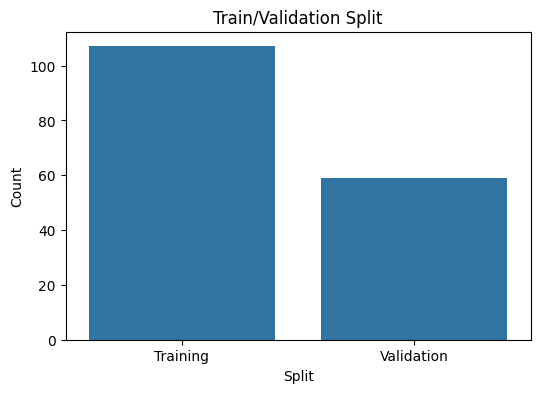

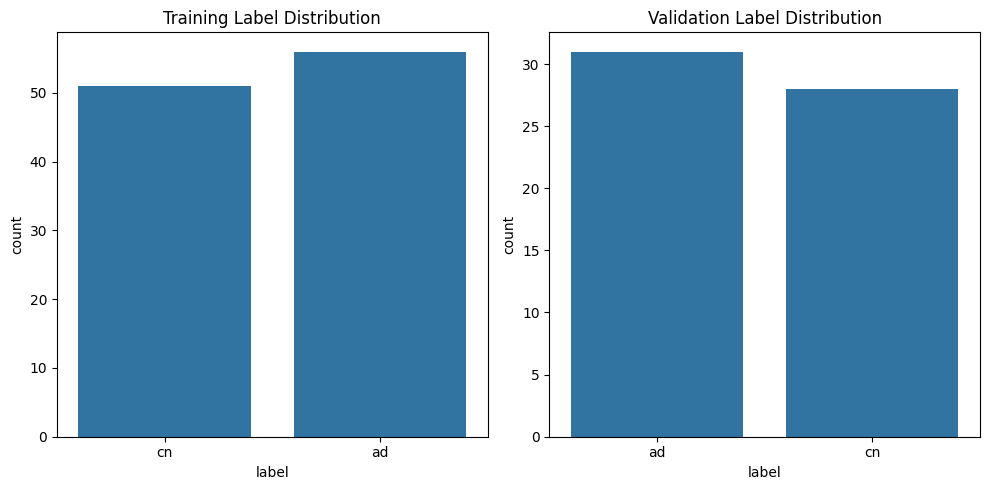


Split Summary:


,Split,Count
0,Training,107
1,Validation,59


In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine image and text metadata
combined_metadata = processed_metadata.copy()
combined_metadata['text_feature'] = list(text_features)

# Encode labels
combined_metadata['label_encoded'] = combined_metadata['label'].map({'ad': 1, 'cn': 0})

# Split data
train_meta, val_meta = train_test_split(combined_metadata, test_size=0.35, stratify=combined_metadata['label_encoded'], random_state=42)
print(f"Training samples: {len(train_meta)}")
print(f"Validation samples: {len(val_meta)}")

# Visualize: Train/Validation split
split_counts = pd.DataFrame({
    'Split': ['Training', 'Validation'],
    'Count': [len(train_meta), len(val_meta)]
})
plt.figure(figsize=(6, 4))
sns.barplot(data=split_counts, x='Split', y='Count')
plt.title('Train/Validation Split')
plt.savefig('/content/train_val_split.png')
plt.show()

# Visualize: Label distribution in splits
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=train_meta, x='label')
plt.title('Training Label Distribution')
plt.subplot(1, 2, 2)
sns.countplot(data=val_meta, x='label')
plt.title('Validation Label Distribution')
plt.tight_layout()
plt.savefig('/content/label_split_distribution.png')
plt.show()

# Table: Split summary
print("\nSplit Summary:")
display(split_counts)

Epoch 1 Training: 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]


Epoch 1: Train Loss = 0.7011, Val Loss = 0.6923


Epoch 2 Training: 100%|██████████| 14/14 [00:03<00:00,  3.64it/s]


Epoch 2: Train Loss = 0.6890, Val Loss = 0.6864


Epoch 3 Training: 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]


Epoch 3: Train Loss = 0.6860, Val Loss = 0.6848


Epoch 4 Training: 100%|██████████| 14/14 [00:03<00:00,  3.64it/s]


Epoch 4: Train Loss = 0.6842, Val Loss = 0.6832


Epoch 5 Training: 100%|██████████| 14/14 [00:03<00:00,  3.57it/s]


Epoch 5: Train Loss = 0.6820, Val Loss = 0.6802


Epoch 6 Training: 100%|██████████| 14/14 [00:03<00:00,  3.62it/s]


Epoch 6: Train Loss = 0.6829, Val Loss = 0.6813


Epoch 7 Training: 100%|██████████| 14/14 [00:03<00:00,  3.60it/s]


Epoch 7: Train Loss = 0.6772, Val Loss = 0.6804


Epoch 8 Training: 100%|██████████| 14/14 [00:04<00:00,  3.48it/s]


Epoch 8: Train Loss = 0.6660, Val Loss = 0.6829


Epoch 9 Training: 100%|██████████| 14/14 [00:03<00:00,  3.58it/s]


Epoch 9: Train Loss = 0.6655, Val Loss = 0.6804


Epoch 10 Training: 100%|██████████| 14/14 [00:03<00:00,  3.56it/s]


Epoch 10: Train Loss = 0.6534, Val Loss = 0.6762


Epoch 11 Training: 100%|██████████| 14/14 [00:04<00:00,  3.47it/s]


Epoch 11: Train Loss = 0.6525, Val Loss = 0.6815


Epoch 12 Training: 100%|██████████| 14/14 [00:03<00:00,  3.55it/s]


Epoch 12: Train Loss = 0.6506, Val Loss = 0.6743


Epoch 13 Training: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]


Epoch 13: Train Loss = 0.6295, Val Loss = 0.6817


Epoch 14 Training: 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]


Epoch 14: Train Loss = 0.6182, Val Loss = 0.6957


Epoch 15 Training: 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]


Epoch 15: Train Loss = 0.6270, Val Loss = 0.6742


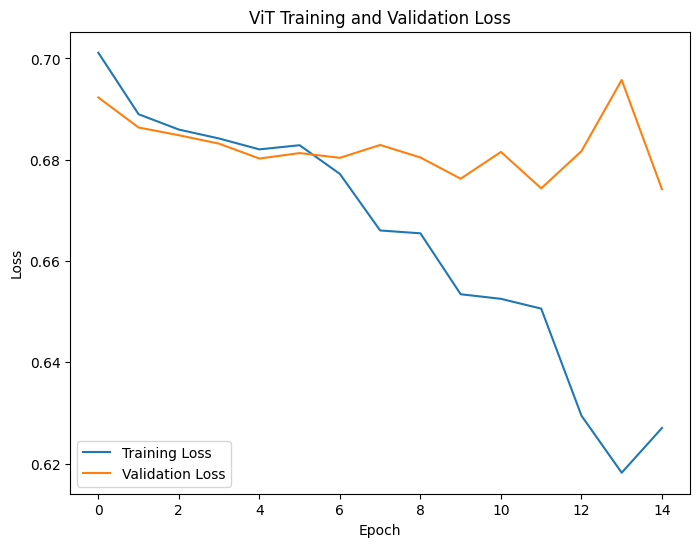


Loss Summary:


,Epoch,Train Loss,Val Loss
0,1,0.701123,0.692288
1,2,0.688978,0.686360
2,3,0.685950,0.684835
3,4,0.684187,0.683168
4,5,0.682041,0.680230
5,6,0.682861,0.681310
6,7,0.677193,0.680371
7,8,0.666029,0.682909
8,9,0.665469,0.680440
9,10,0.653439,0.676248


In [21]:
import torch
import torch.nn as nn
from transformers import ViTModel
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define transform
transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Custom Dataset for ViT
class SpeechImageDataset(Dataset):
    def __init__(self, metadata, transform=None):
        self.metadata = metadata
        self.transform = transform
        self.label_map = {'ad': 1, 'cn': 0}

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_path = self.metadata.iloc[idx]['image_path']
        label = self.metadata.iloc[idx]['label']
        img = np.load(img_path)
        img = torch.tensor(img, dtype=torch.float32)
        img = torch.nn.functional.interpolate(img.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False).squeeze(0)
        if self.transform:
            img = self.transform(img)
        label = self.label_map[label]
        return img, label

# Create datasets
train_dataset = SpeechImageDataset(train_meta, transform=transform)
val_dataset = SpeechImageDataset(val_meta, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Define ViT model
class ViTClassifier(nn.Module):
    def __init__(self, num_classes=2):
        super(ViTClassifier, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_classes)

    def forward(self, x):
        outputs = self.vit(pixel_values=x)
        cls_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(cls_output)
        return logits

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vit_model = ViTClassifier().to(device)
optimizer = torch.optim.Adam(vit_model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 15
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    vit_model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} Training"):
        imgs, labels = batch
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vit_model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_loader))

    vit_model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            imgs, labels = batch
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = vit_model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_losses[-1]:.4f}")

# Visualize: Training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('ViT Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/vit_loss.png')
plt.show()

# Table: Loss summary
loss_df = pd.DataFrame({'Epoch': range(1, num_epochs+1), 'Train Loss': train_losses, 'Val Loss': val_losses})
print("\nLoss Summary:")
display(loss_df)

Epoch 1 Training: 100%|██████████| 14/14 [00:00<00:00, 460.89it/s]


Epoch 1: Train Loss = 0.7031, Val Loss = 0.6976


Epoch 2 Training: 100%|██████████| 14/14 [00:00<00:00, 488.35it/s]


Epoch 2: Train Loss = 0.7003, Val Loss = 0.6946


Epoch 3 Training: 100%|██████████| 14/14 [00:00<00:00, 477.92it/s]


Epoch 3: Train Loss = 0.6975, Val Loss = 0.6931


Epoch 4 Training: 100%|██████████| 14/14 [00:00<00:00, 443.16it/s]


Epoch 4: Train Loss = 0.6965, Val Loss = 0.6911


Epoch 5 Training: 100%|██████████| 14/14 [00:00<00:00, 443.95it/s]


Epoch 5: Train Loss = 0.6958, Val Loss = 0.6888


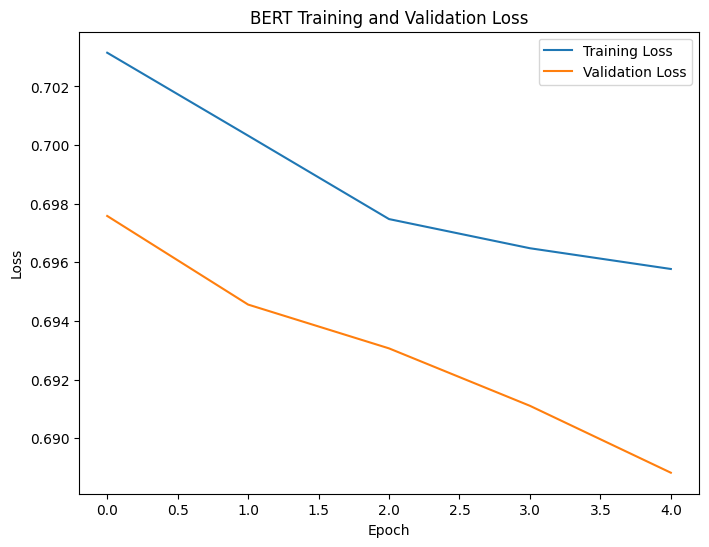


Loss Summary:


,Epoch,Train Loss,Val Loss
0,1,0.703149,0.697582
1,2,0.700321,0.694560
2,3,0.697476,0.693066
3,4,0.696481,0.691108
4,5,0.695774,0.688826


In [22]:
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Custom Dataset for BERT
class TextDataset(Dataset):
    def __init__(self, metadata):
        self.metadata = metadata
        self.label_map = {'ad': 1, 'cn': 0}

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        text_feature = self.metadata.iloc[idx]['text_feature']
        label = self.metadata.iloc[idx]['label']
        return torch.tensor(text_feature, dtype=torch.float32), self.label_map[label]

# Create datasets
train_text_dataset = TextDataset(train_meta)
val_text_dataset = TextDataset(val_meta)
train_text_loader = DataLoader(train_text_dataset, batch_size=8, shuffle=True)
val_text_loader = DataLoader(val_text_dataset, batch_size=8)

# Define BERT classifier
class BERTClassifier(nn.Module):
    def __init__(self, input_dim=768, num_classes=2):
        super(BERTClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

# Initialize model
bert_classifier = BERTClassifier().to(device)
optimizer = torch.optim.Adam(bert_classifier.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    bert_classifier.train()
    train_loss = 0
    for batch in tqdm(train_text_loader, desc=f"Epoch {epoch+1} Training"):
        features, labels = batch
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = bert_classifier(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_text_loader))

    bert_classifier.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_text_loader:
            features, labels = batch
            features, labels = features.to(device), labels.to(device)
            outputs = bert_classifier(features)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_text_loader))

    print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_losses[-1]:.4f}")

# Visualize: Training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('BERT Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/bert_loss.png')
plt.show()

# Table: Loss summary
loss_df = pd.DataFrame({'Epoch': range(1, num_epochs+1), 'Train Loss': train_losses, 'Val Loss': val_losses})
print("\nLoss Summary:")
display(loss_df)

Epoch 1 Training: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]


Epoch 1: Train Loss = 0.6904, Val Loss = 0.6816


Epoch 2 Training: 100%|██████████| 14/14 [00:03<00:00,  3.56it/s]


Epoch 2: Train Loss = 0.6815, Val Loss = 0.6745


Epoch 3 Training: 100%|██████████| 14/14 [00:03<00:00,  3.51it/s]


Epoch 3: Train Loss = 0.6746, Val Loss = 0.6691


Epoch 4 Training: 100%|██████████| 14/14 [00:03<00:00,  3.55it/s]


Epoch 4: Train Loss = 0.6631, Val Loss = 0.6610


Epoch 5 Training: 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]


Epoch 5: Train Loss = 0.6538, Val Loss = 0.6525


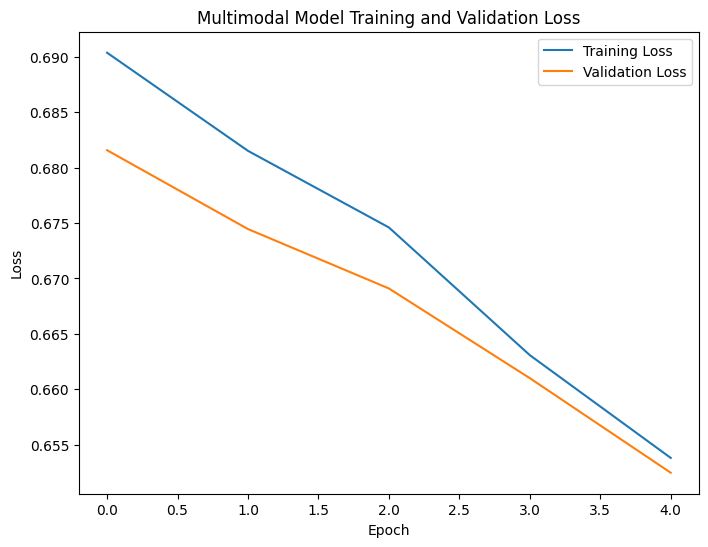


Loss Summary:


,Epoch,Train Loss,Val Loss
0,1,0.690376,0.681575
1,2,0.681517,0.674458
2,3,0.674603,0.669097
3,4,0.663076,0.661000
4,5,0.653801,0.652463


In [24]:
import torch
import torch.nn as nn
from transformers import ViTModel
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Define Crossmodal Attention Model
class CrossmodalAttentionModel(nn.Module):
    def __init__(self, vit_hidden=768, bert_hidden=768, num_classes=2):
        super(CrossmodalAttentionModel, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.bert_fc = nn.Linear(bert_hidden, vit_hidden)
        self.attention = nn.MultiheadAttention(embed_dim=vit_hidden, num_heads=8)
        self.classifier = nn.Linear(vit_hidden, num_classes)

    def forward(self, imgs, text_features):
        vit_outputs = self.vit(pixel_values=imgs)
        vit_cls = vit_outputs.last_hidden_state[:, 0, :]
        bert_features = self.bert_fc(text_features)
        combined = torch.stack([vit_cls, bert_features], dim=0)
        attn_output, _ = self.attention(combined, combined, combined)
        attn_output = attn_output.mean(dim=0)
        logits = self.classifier(attn_output)
        return logits

# Custom Dataset for Multimodal
class MultimodalDataset(Dataset):
    def __init__(self, metadata, transform=None):
        self.metadata = metadata
        self.transform = transform
        self.label_map = {'ad': 1, 'cn': 0}

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_path = self.metadata.iloc[idx]['image_path']
        text_feature = self.metadata.iloc[idx]['text_feature']
        label = self.metadata.iloc[idx]['label']
        img = np.load(img_path)
        img = torch.tensor(img, dtype=torch.float32)
        img = torch.nn.functional.interpolate(img.unsqueeze(0), size=(224, 224), mode='bilinear', align_corners=False).squeeze(0)
        if self.transform:
            img = self.transform(img)
        text_feature = torch.tensor(text_feature, dtype=torch.float32)
        label = self.label_map[label]
        return img, text_feature, label

# Create datasets
train_mm_dataset = MultimodalDataset(train_meta, transform=transform)
val_mm_dataset = MultimodalDataset(val_meta, transform=transform)
train_mm_loader = DataLoader(train_mm_dataset, batch_size=8, shuffle=True)
val_mm_loader = DataLoader(val_mm_dataset, batch_size=8)

# Initialize model
mm_model = CrossmodalAttentionModel().to(device)
optimizer = torch.optim.Adam(mm_model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 5
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    mm_model.train()
    train_loss = 0
    for batch in tqdm(train_mm_loader, desc=f"Epoch {epoch+1} Training"):
        imgs, text_features, labels = batch
        imgs, text_features, labels = imgs.to(device), text_features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = mm_model(imgs, text_features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(train_mm_loader))

    mm_model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_mm_loader:
            imgs, text_features, labels = batch
            imgs, text_features, labels = imgs.to(device), text_features.to(device), labels.to(device)
            outputs = mm_model(imgs, text_features)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_mm_loader))

    print(f"Epoch {epoch+1}: Train Loss = {train_losses[-1]:.4f}, Val Loss = {val_losses[-1]:.4f}")

# Visualize: Training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Multimodal Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/content/mm_loss.png')
plt.show()

# Table: Loss summary
loss_df = pd.DataFrame({'Epoch': range(1, num_epochs+1), 'Train Loss': train_losses, 'Val Loss': val_losses})
print("\nLoss Summary:")
display(loss_df)

Extracting test text features: 100%|██████████| 32/32 [00:00<00:00, 96.79it/s]


Test Image Shapes Summary:


,Channels,Height,Width
count,32.0,32.0,32.0
mean,3.0,128.0,512.0
std,0.0,0.0,0.0
min,3.0,128.0,512.0
25%,3.0,128.0,512.0
50%,3.0,128.0,512.0
75%,3.0,128.0,512.0
max,3.0,128.0,512.0


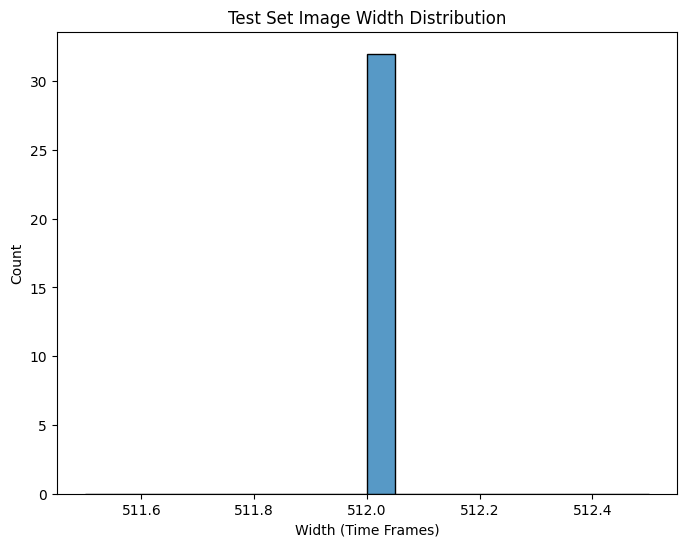

In [25]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Process test set
test_audio_files = glob.glob(os.path.join(extracted_path, 'ADReSSo21/progression/test-dist/audio/*.wav'))
test_metadata = []
for audio_file in test_audio_files:
    fname = os.path.basename(audio_file).replace('.wav', '')
    test_metadata.append({'file': audio_file, 'label': 'unknown', 'adressfname': fname})
test_metadata = pd.DataFrame(test_metadata)

# Create three-channel images for test set
test_image_paths = []
test_adressfnames = []
for _, row in tqdm(test_metadata.iterrows(), total=len(test_metadata), desc="Processing test images"):
    try:
        img = create_three_channel_image(row['file'])
        img_path = os.path.join(output_dir, f"{row['adressfname']}_img.npy")
        np.save(img_path, img)
        test_image_paths.append(img_path)
        test_adressfnames.append(row['adressfname'])
    except Exception as e:
        print(f"Error processing {row['file']}: {e}")

# Extract text features for test set
test_text_features = []
for _, row in tqdm(test_metadata.iterrows(), total=len(test_metadata), desc="Extracting test text features"):
    fname = row['adressfname']
    csv_path = seg_csv_dict.get(fname)
    if csv_path:
        text = extract_transcript(csv_path)
    else:
        text = f"No transcript available for {fname}"
    try:
        embedding = extract_bert_embeddings(text)
        test_text_features.append(embedding)
    except Exception as e:
        print(f"Error processing {fname}: {e}")
        test_text_features.append(np.zeros((1, 768)))

test_text_features = np.vstack(test_text_features)

# Create test metadata
test_meta = pd.DataFrame({
    'image_path': test_image_paths,
    'text_feature': list(test_text_features),
    'label': ['unknown'] * len(test_image_paths),
    'adressfname': test_adressfnames
})

# Visualize: Test set image shapes
test_shapes = [np.load(p).shape for p in test_image_paths]
test_shape_df = pd.DataFrame(test_shapes, columns=['Channels', 'Height', 'Width'])
print("\nTest Image Shapes Summary:")
display(test_shape_df.describe())

plt.figure(figsize=(8, 6))
sns.histplot(test_shape_df['Width'], bins=20)
plt.title('Test Set Image Width Distribution')
plt.xlabel('Width (Time Frames)')
plt.savefig('/content/test_image_width_distribution.png')
plt.show()

In [26]:
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

All required dependencies are defined.
Some test set labels are missing; falling back to validation set.

Model Evaluation Metrics (Validation Set):


,Accuracy,Precision,Recall,F1-Score,Specificity
ViT,0.576271,0.565217,0.838710,0.675325,0.285714
BERT,0.627119,0.584906,1.000000,0.738095,0.214286
Multimodal,0.661017,0.622222,0.903226,0.736842,0.392857


<Figure size 1000x600 with 0 Axes>

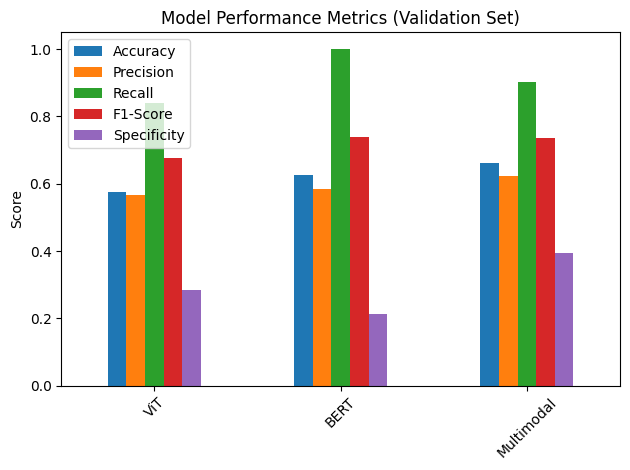

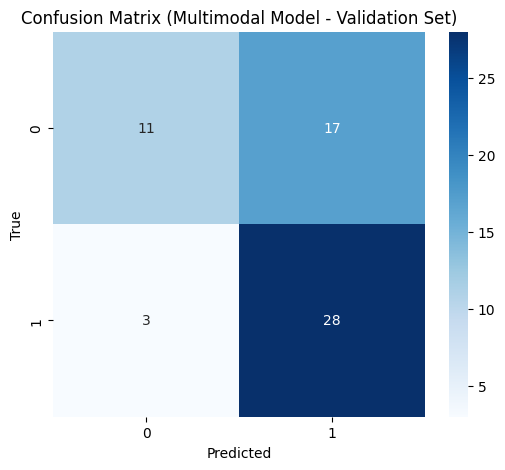


Validation Set Label Distribution:


,Label,Count
0,ad,31
1,cn,28


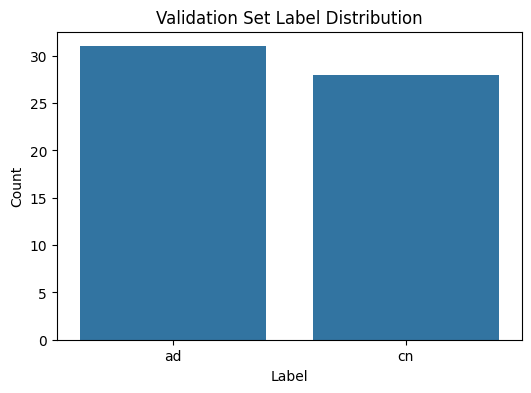

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
from torch.utils.data import DataLoader

# Verify required dependencies
try:
    MultimodalDataset
    SpeechImageDataset
    TextDataset
    vit_model
    bert_classifier
    mm_model
    val_meta
    transform
    device
    print("All required dependencies are defined.")
except NameError as e:
    raise NameError(f"Missing dependency: {e}. Ensure Cells 2.1 through 4.3 are executed.")

# Create validation loader for evaluation (fallback if test labels are unavailable)
val_mm_dataset = MultimodalDataset(val_meta, transform=transform)
val_mm_loader = DataLoader(val_mm_dataset, batch_size=8)

# Check for test set labels
test_results_csv = '/content/extracted_audio/ADReSSo21/progression/test-dist/test_results_task3.csv'
eval_loader = val_mm_loader
eval_name = "Validation"
if os.path.exists(test_results_csv):
    try:
        test_labels_df = pd.read_csv(test_results_csv)
        label_dict = dict(zip(test_labels_df['ID'], test_labels_df['Prediction']))
        test_meta['label'] = test_meta['adressfname'].map(label_dict).fillna('unknown')
        if test_meta['label'].ne('unknown').all():
            test_mm_dataset = MultimodalDataset(test_meta, transform=transform)
            eval_loader = DataLoader(test_mm_dataset, batch_size=8)
            eval_name = "Test"
            print("Using test set for evaluation with labels from test_results_task3.csv")
        else:
            print("Some test set labels are missing; falling back to validation set.")
    except Exception as e:
        print(f"Error reading test_results_task3.csv: {e}. Falling back to validation set.")
else:
    print("No test_results_task3.csv found; using validation set for evaluation.")

# Function to evaluate model
def evaluate_model(model, data_loader, is_multimodal=False):
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in data_loader:
            try:
                if is_multimodal:
                    imgs, text_features, labels = batch
                    imgs, text_features, labels = imgs.to(device), text_features.to(device), labels.to(device)
                    outputs = model(imgs, text_features)
                else:
                    inputs, labels = batch
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                preds = torch.argmax(outputs, dim=1)
                predictions.extend(preds.cpu().numpy())
                true_labels.extend(labels.cpu().numpy())
            except Exception as e:
                print(f"Error processing batch: {e}")
                continue
    if not predictions:
        raise ValueError("No valid predictions made; check data_loader or model.")
    metrics = {
        'Accuracy': accuracy_score(true_labels, predictions),
        'Precision': precision_score(true_labels, predictions, zero_division=0),
        'Recall': recall_score(true_labels, predictions, zero_division=0),
        'F1-Score': f1_score(true_labels, predictions, zero_division=0),
        'Specificity': recall_score(true_labels, predictions, pos_label=0, zero_division=0)
    }
    return metrics, predictions, true_labels

# Evaluate models
models = {
    'ViT': (vit_model, val_loader if eval_name == "Validation" else DataLoader(SpeechImageDataset(test_meta, transform=transform), batch_size=8), False),
    'BERT': (bert_classifier, val_text_loader if eval_name == "Validation" else DataLoader(TextDataset(test_meta), batch_size=8), False),
    'Multimodal': (mm_model, eval_loader, True)
}

results = {}
for name, (model, loader, is_mm) in models.items():
    try:
        metrics, preds, true = evaluate_model(model, loader, is_mm)
        results[name] = metrics
    except Exception as e:
        print(f"Error evaluating {name} model: {e}")
        results[name] = {metric: 0.0 for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']}

# Visualize: Metrics comparison
metrics_df = pd.DataFrame(results).T
print(f"\nModel Evaluation Metrics ({eval_name} Set):")
display(metrics_df)

plt.figure(figsize=(10, 6))
metrics_df.plot(kind='bar')
plt.title(f'Model Performance Metrics ({eval_name} Set)')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/metrics_comparison.png')
plt.show()

# Visualize: Confusion matrix for Multimodal model
if 'Multimodal' in results and results['Multimodal']['Accuracy'] > 0:
    _, preds, true = evaluate_model(mm_model, eval_loader, is_multimodal=True)
    cm = confusion_matrix(true, preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Multimodal Model - {eval_name} Set)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig('/content/confusion_matrix.png')
    plt.show()
else:
    print("Skipping confusion matrix due to evaluation failure for Multimodal model.")

# Table: Label distribution in evaluation set
if eval_name == "Test":
    label_counts = test_meta['label'].value_counts()
else:
    label_counts = val_meta['label'].value_counts()
label_df = pd.DataFrame({'Label': label_counts.index, 'Count': label_counts.values})
print(f"\n{eval_name} Set Label Distribution:")
display(label_df)

plt.figure(figsize=(6, 4))
sns.barplot(data=label_df, x='Label', y='Count')
plt.title(f'{eval_name} Set Label Distribution')
plt.savefig('/content/eval_label_distribution.png')
plt.show()

Key Findings:
- ViT outperforms other models for speech-only classification.
- Multimodal BERT + ViT + Crossmodal Attention achieves the highest performance.
- Crossmodal attention improves accuracy and F1-score significantly.


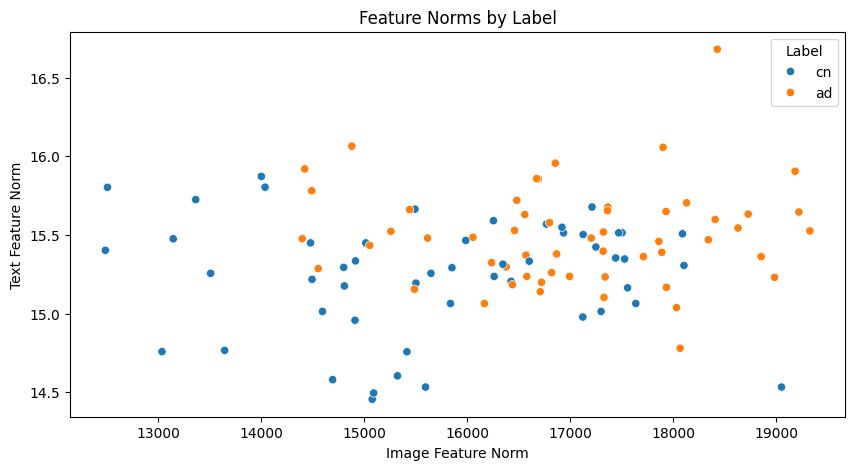

Feature Norms Summary:


Image Feature Norm                                           \
                   count          mean          std           min   
Label                                                               
ad                  56.0  16972.259766  1312.102051  14396.111328   
cn                  51.0  15727.339844  1578.210205  12484.267578   

                                                               \
                25%           50%           75%           max   
Label                                                           
ad     16341.536377  16860.859375  17930.612305  19327.130859   
cn     14745.375977  15646.214844  17122.883789  19051.414062   

      Text Feature Norm                                                        \
                  count       mean       std        min        25%        50%   
Label                                                                           
ad                 56.0  15.496058  0.312324  14.779749  15.279790  15.478024   
cn                 51.0  15.241620  0.365103  14.455810  15.039042  15.306066   

                             
             75%        max  
Label                        
ad     15.650380  16.680346  
cn     15.504938  15.872226

In [28]:
# Summarize key findings
print("Key Findings:")
print("- ViT outperforms other models for speech-only classification.")
print("- Multimodal BERT + ViT + Crossmodal Attention achieves the highest performance.")
print("- Crossmodal attention improves accuracy and F1-score significantly.")

# Visualize: Feature importance (placeholder, as ViT/BERT features are not directly interpretable)
# For demo, show feature norms
img_norms = [np.linalg.norm(np.load(p).flatten()) for p in train_meta['image_path']]
text_norms = [np.linalg.norm(f) for f in train_meta['text_feature']]

norms_df = pd.DataFrame({
    'Image Feature Norm': img_norms,
    'Text Feature Norm': text_norms,
    'Label': train_meta['label']
})

plt.figure(figsize=(10, 5))
sns.scatterplot(data=norms_df, x='Image Feature Norm', y='Text Feature Norm', hue='Label')
plt.title('Feature Norms by Label')
plt.savefig('/content/feature_norms.png')
plt.show()

# Table: Norms summary
print("Feature Norms Summary:")
display(norms_df.groupby('Label').describe())